# Question 1 
[Chatlog][url:https://chatgpt.com/share/66f61fe5-568c-8001-8dfc-a1394ee1e35d]

### Summary of Our Interaction:

- **Initial Request**: You started by sharing a task from your **STA130 notebook**, where you wanted help marking the **location (mean and median)** and **scale (range, IQR, and ±2 standard deviations from the mean)** on **Plotly histograms** for the `flipper_length_mm` for each species in the penguins dataset.
  
- **Plotly Histogram Guidance**: I provided step-by-step instructions and code that:
  1. Plots histograms for each penguin species.
  2. Adds vertical lines for the **mean** and **median**.
  3. Adds vertical rectangles to represent the **range**, **interquartile range (IQR)**, and the range of **±2 standard deviations from the mean**.

- **Code Explanation**: You asked for a detailed explanation of the code and methods. I explained the different functions used, such as `add_vline()` and `add_vrect()` for adding lines and rectangles to the plots, along with the use of NumPy for computing statistical measures.

- **What is Plotly?**: You requested an overview of Plotly, and I explained that it’s a library for creating interactive visualizations in Python, highlighting its features and use cases.

- **What is NumPy?**: You also asked about NumPy, and I described it as a fundamental library for scientific computing in Python, focusing on its use in numerical computations and array manipulation.

### Final Working Code:

```python
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the Penguins Dataset
penguins = sns.load_dataset('penguins')

# Group by species and calculate statistical measures
grouped_penguins = penguins.groupby('species')['flipper_length_mm']

# Aggregating statistics for each species
stats = grouped_penguins.agg(
    mean_flipper=np.mean,
    median_flipper=np.median,
    flipper_min=np.min,
    flipper_max=np.max,
    flipper_std=np.std,
    q25=lambda x: np.percentile(x.dropna(), 25),
    q75=lambda x: np.percentile(x.dropna(), 75)
)

# Calculate IQR and ±2 standard deviations range
stats['iqr'] = stats['q75'] - stats['q25']
stats['flipper_2std_low'] = stats['mean_flipper'] - 2 * stats['flipper_std']
stats['flipper_2std_high'] = stats['mean_flipper'] + 2 * stats['flipper_std']

# Create the Plotly Histogram
fig = go.Figure()

# Loop through each species to add histogram and statistical markers
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm'].dropna()
    
    # Add histogram for current species
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=f'{species} Flipper Length',
        opacity=0.75
    ))
    
    # Extract the species-specific statistics
    species_stats = stats.loc[species]
    
    # Add vertical lines for mean and median
    fig.add_vline(x=species_stats['mean_flipper'], line_width=2, line_dash='dash', line_color='green', annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=species_stats['median_flipper'], line_width=2, line_dash='dash', line_color='blue', annotation_text="Median", annotation_position="top right")
    
    # Add rectangles for range and IQR
    fig.add_vrect(x0=species_stats['flipper_min'], x1=species_stats['flipper_max'], fillcolor='lightgrey', opacity=0.3, line_width=0, annotation_text="Range")
    fig.add_vrect(x0=species_stats['q25'], x1=species_stats['q75'], fillcolor='lightblue', opacity=0.3, line_width=0, annotation_text="IQR")
    
    # Add rectangle for ±2 standard deviations from the mean
    fig.add_vrect(x0=species_stats['flipper_2std_low'], x1=species_stats['flipper_2std_high'], fillcolor='lightgreen', opacity=0.2, line_width=0, annotation_text="±2 Std Dev")

# Update the layout for better visualization
fig.update_layout(
    title="Flipper Length (mm) Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    showlegend=True
)

# Show the figure
fig.show()
```

This code generates a histogram for each species and overlays the **mean**, **median**, **range**, **IQR**, and **±2 standard deviations from the mean** as visual markers.

# Question 2
[Chatlog][url:https://chatgpt.com/share/66f61fe5-568c-8001-8dfc-a1394ee1e35d]

### Summary of Our Interaction for the Second Question:

- **Objective**: You wanted to transition the previous problem (Plotly histograms with statistical markers) into a solution using **Seaborn KDE plots** while incorporating statistical markers (mean, median, range, interquartile range (IQR), and ±2 standard deviations from the mean). Additionally, the plots should be organized into a row of three plots, one for each penguin species.

- **Initial Solution**: I provided a Seaborn-based solution, where we used **KDE plots** (`kdeplot`) to display the flipper length distribution for each penguin species and added markers using **Matplotlib** functions (`axvline()` and `axvspan()`) to mark the mean, median, and shaded areas for the range, IQR, and ±2 standard deviations from the mean.

- **Further Refinement**: You noted that since Seaborn extends Matplotlib, **Matplotlib functions** like `axvspan()` and `fill_between()` could be combined with the KDE plots to further enhance the visualization. I provided an updated solution incorporating **`fill_between()`** to shade the area under the KDE curve between specified ranges (such as min/max) and demonstrated how to combine both Seaborn and Matplotlib functionality.

In this interaction, we explored how to leverage Seaborn for creating smooth KDE plots, and then used Matplotlib’s versatility to add custom statistical annotations and enhance the visualization by highlighting important data ranges.

Let me know if you'd like any further clarifications!

# Question 3
[Chatlog][url:https://chatgpt.com/share/66f61fe5-568c-8001-8dfc-a1394ee1e35d]


Here’s a summary of our interaction for the third question that you can paste into your homework notebook:

---

### Summary of Our Interaction for the Third Question:

- **Objective**: You described your understanding of the differences between **box plots**, **histograms**, and **kernel density estimators (KDE)**, particularly noting that box plots graph data horizontally and highlight key features like Q1, Q3, and the median, while histograms and KDEs graph data vertically and focus on visualizing the distribution of data.

- **Discussion and Refinement**: I expanded on your description by explaining that:
  1. **Box plots** can be oriented either horizontally or vertically and provide a compact summary of key statistics (median, quartiles, and outliers).
  2. **Histograms** and **KDE plots** typically graph data vertically but differ in that histograms represent frequency counts in bins, while KDEs give a smoothed, continuous estimate of the distribution.
  
  I also clarified that the real contrast between these plots lies in how they represent **distribution** and **summary statistics**:
  - Box plots emphasize **summary statistics** like the median and quartiles.
  - Histograms and KDEs focus on displaying the **density and shape** of the data's distribution.

- **Pros and Cons**: I provided a detailed comparison of the **pros and cons** of each plot, highlighting the strengths and limitations of **box plots**, **histograms**, and **KDE plots** in terms of representing data, revealing key features, handling large datasets, and sensitivity to parameters like bin size or bandwidth.

---

My personal preference
- I perfer to use box plots because it shows key summary statistics in compact form.It includes, mean, quartiles (Q1, Q3), range, outliers in a compact form so it is very easy to identify. Furthermore, it is great for comparison. To elaborate, it is possible to use group of box plots to compare how different categories of data very in terms of their mean, spread, and presence of outliers. Moreover, box plots are non-parametric, meaning that they do not make any assumptions about the underlying distribution of the data. It can also clearly identify potential outliers using whiskers. Lastly, it handles large datasets efficiently as they do not plot every individual point but instead summarize the data with a few key metrics. The reasons above is my reasoning for my preference for box plots over the other two data distribution. 



# Question 4
[Chatlog][url:https://chatgpt.com/share/66f61fe5-568c-8001-8dfc-a1394ee1e35d]

1. 
Dataset B and Dataset D:
Both have means in the range of 5 to 6 and relatively low variance. Dataset B has a slightly larger variance, but both distributions are relatively centered around similar means.

2. 
Dataset B and Dataset A:
Both datasets have a mean around 5, but the variance of Dataset A (uniform) is much higher because it spreads over the entire range from 0 to 10, while Dataset B has a normal distribution with a smaller standard deviation (1.5).

3. 
Dataset B and Dataset D:
Both have normal distributions with relatively low variance but different means. Dataset B has a mean of 5, while Dataset D has a mean of 6.

4. 
Dataset A and Dataset C:
Dataset A has a mean around 5 and high variance due to its uniform distribution over a wide range.
Dataset C has a bimodal distribution with peaks at 2 and 8, leading to a significantly different mean and higher variance compared to Dataset A.

# Question 5
[Chatlog URL:https://chatgpt.com/share/66f62845-dba4-8001-9f05-2da535d2da2f]

In a perfectly symmetrical distribution, the mean and median are equal because the data is evenly distributed around the center When a distribution is right-skewed, the mean is greater than the median. This happens because the long tail on the right side pulls the mean to the right, while the median remains relatively stable in the middle of the data.
In a left-skewed distribution, the mean is less than the median. The long tail on the left side pulls the mean to the left, but the median remains closer to the center of the data.

Generating right skewed data : sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

Calculating the mean and median for sample1: 

sample1.mean()  
np.quantile(sample1, [0.5])  # Median of the right-skewed data

Generating left-skewed data: sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)


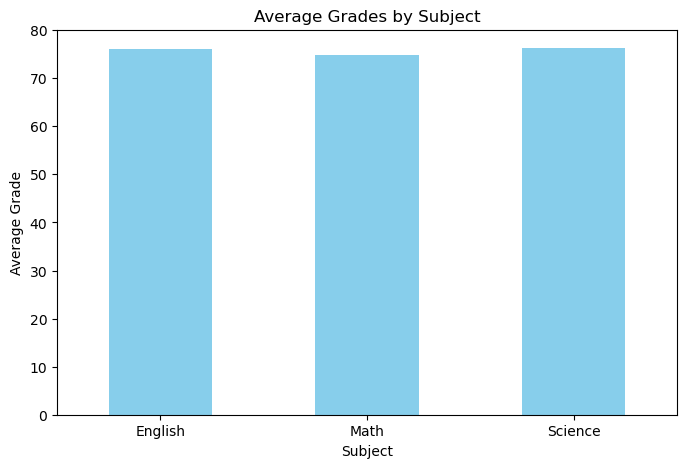

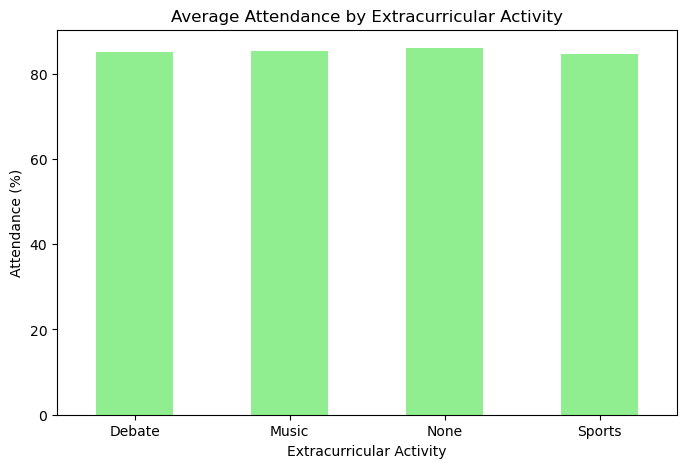

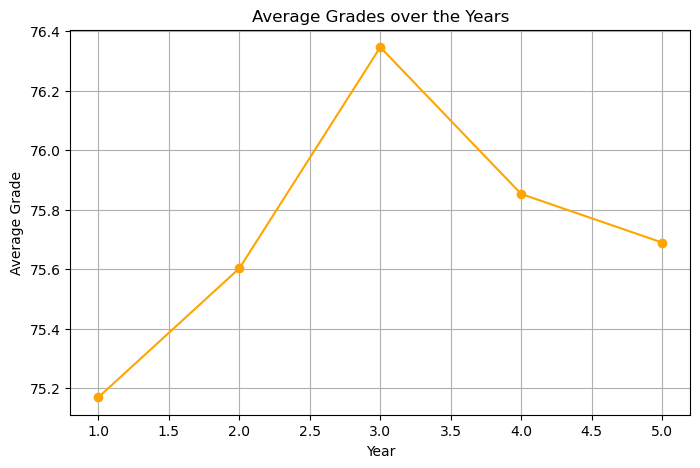

        Student_ID         Year        Grade   Attendance
count  1500.000000  1500.000000  1500.000000  1500.000000
mean     50.500000     3.000000    75.732667    85.252427
std      28.875697     1.414685    14.716122     8.566125
min       1.000000     1.000000    50.000000    70.010000
25%      25.750000     2.000000    63.000000    78.137500
50%      50.500000     3.000000    76.000000    85.690000
75%      75.250000     4.000000    88.000000    92.312500
max     100.000000     5.000000   100.000000    99.990000


In [9]:
# Question 6 
#Interesting dataset (generated by CHATGPT) 
#- My dataset tracks the performance of fictional students in an imaginary school over five years, show their grades and involvement in extracurricular. 

#Summary Statistics: The summary statistics give us a general overview:
#The average grade across all subjects is 75.73 with a standard deviation of 14.72.
#The attendance rate averages 85.25%, with a minimum of 70.01% and a maximum of 100%.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate fictional student data
num_students = 100  # 100 students
years = [1, 2, 3, 4, 5]  # 5 years
subjects = ['Math', 'Science', 'English']
activities = ['Sports', 'Music', 'Debate', 'None']

# Student IDs and names
student_ids = np.arange(1, num_students + 1)
names = [f'Student_{i}' for i in student_ids]

# Create the dataset
data = []
for student_id, name in zip(student_ids, names):
    for year in years:
        for subject in subjects:
            grade = np.random.randint(50, 101)  # Grades between 50 and 100
            activity = np.random.choice(activities)  # Random activity
            attendance = np.random.uniform(70, 100)  # Attendance between 70% and 100%
            data.append([student_id, name, year, subject, grade, activity, round(attendance, 2)])

# Create DataFrame
columns = ['Student_ID', 'Name', 'Year', 'Subject', 'Grade', 'Extracurricular Activity', 'Attendance']
df_students = pd.DataFrame(data, columns=columns)

# Summary statistics for the dataset
summary_stats = df_students.describe()

# Grouping data for visualization
average_grades_by_subject = df_students.groupby('Subject')['Grade'].mean()
attendance_by_activity = df_students.groupby('Extracurricular Activity')['Attendance'].mean()
grades_by_year = df_students.groupby('Year')['Grade'].mean()

# Visualization 1: Average grades by subject
plt.figure(figsize=(8, 5))
average_grades_by_subject.plot(kind='bar', color='skyblue')
plt.title('Average Grades by Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

# Visualization 2: Attendance by extracurricular activity
plt.figure(figsize=(8, 5))
attendance_by_activity.plot(kind='bar', color='lightgreen')
plt.title('Average Attendance by Extracurricular Activity')
plt.ylabel('Attendance (%)')
plt.xticks(rotation=0)
plt.show()

# Visualization 3: Average grades over the years
plt.figure(figsize=(8, 5))
grades_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Grades over the Years')
plt.xlabel('Year')
plt.ylabel('Average Grade')
plt.grid(True)
plt.show()

# Display the summary statistics
print(summary_stats)


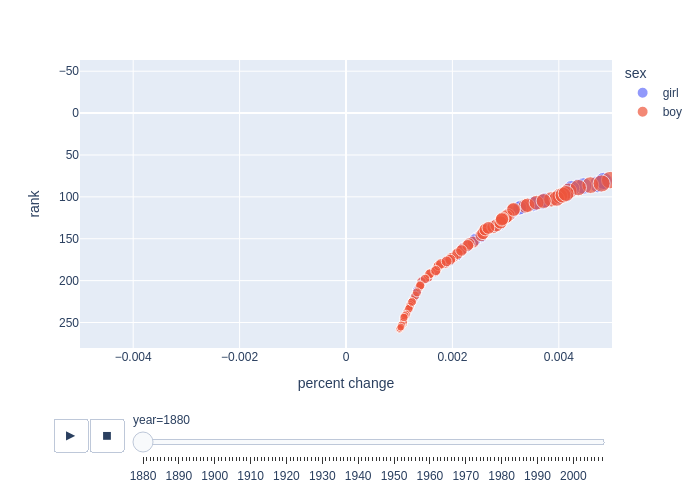

In [7]:
# Question 8

import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Modify the 'name' column to make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank names by their percentage popularity in descending order for each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort by name and year
bn = bn.sort_values(['name', 'year'])

# Create the 'percent change' column, which calculates the change from the last year
bn['percent change'] = bn['percent'].diff()

# Identify new names and assign their percentage change to their current percent
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year
bn = bn.sort_values('year')

# Restrict to common names (percent > 0.001)
bn = bn[bn.percent > 0.001]

# Create the scatter plot with the given specifications
fig = px.scatter(
    bn, 
    x="percent change", 
    y="rank", 
    animation_frame="year", 
    animation_group="name", 
    size="percent", 
    color="sex", 
    hover_name="name", 
    size_max=50, 
    range_x=[-0.005, 0.005]  # Range for percent change
)

# Update the y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the plot (using renderer="png" for submission)
fig.show(renderer="png")


# Question 9
Yes I have indeed reviewed the course textbook. I find the instructions quiet confusing at first but figured out how to solve it when looking at Piazza.